In [1]:
import numpy as np
import pandas as pd
from FS import feature_select, delete_zero_and_var
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, scale, RobustScaler, StandardScaler
import seaborn as sns
from sklearn.metrics import mean_squared_error,r2_score, mean_absolute_error


In [97]:
# 读取cvs训练数据集
cvs_path = "./data/csv/Molecular_Descriptor_train.csv"
df = pd.read_csv(cvs_path, index_col=0).drop("SMILES", axis=1)

cvs_test_path = "./data/csv/Molecular_Descriptor_test.csv"
test_df = pd.read_csv(cvs_test_path, index_col=0).drop("SMILES", axis=1)

In [98]:
# 数据分割

X = df.drop(['pIC50'], axis=1)
y = df['pIC50']


# 特征选择
no_zero_X = delete_zero_and_var(X, 0.005)
# 提取后的总训练集和选择的列Name
X_feature, selected = feature_select(X, no_zero_X, y, "RFR", 20)

最终剩余特征数 332
sum=0特征:  225 方差过小特征:  172
['ALogP', 'ALogp2', 'AMR', 'apol', 'nAtom', 'nHeavyAtom', 'nH', 'nB', 'nN', 'nP', 'nCl', 'nI', 'ATSc1', 'ATSc2', 'ATSc4', 'ATSc5', 'ATSm1', 'ATSm2', 'ATSm3', 'ATSm4', 'ATSm5', 'ATSp1', 'ATSp2', 'nBase', 'nBonds', 'nBonds2', 'nBondsS', 'nBondsS2', 'nBondsS3', 'nBondsD2', 'nBondsQ', 'bpol', 'C1SP2', 'VCH-4', 'SC-3', 'SC-6', 'SPC-4', 'SP-0', 'SP-1', 'SP-2', 'SP-3', 'VP-0', 'VP-1', 'VP-2', 'CrippenLogP', 'CrippenMR', 'ECCEN', 'nHBd', 'nwHBd', 'nHBa', 'nHBint2', 'nHBint3', 'nHBint5', 'nHBint6', 'nHBint7', 'nHBint8', 'nHBint9', 'nHBint10', 'nHdNH', 'nHsSH', 'nHsNH2', 'nHssNH', 'nHsNH3p', 'nHssNH2p', 'nHsssNHp', 'nHCsatu', 'nHmisc', 'nsLi', 'nssBe', 'nssssBem', 'nsBH2', 'nssBH', 'nsssB', 'nssssBm', 'nddC', 'ndssC', 'nsNH3p', 'nsNH2', 'nssNH2p', 'ndNH', 'nssNH', 'nsssNHp', 'nddsN', 'nssssNp', 'ndO', 'naOm', 'nsOm', 'nsSiH3', 'nssSiH2', 'nsssSiH', 'nssssSi', 'nsPH2', 'nssPH', 'nsssP', 'ndsssP', 'nddsP', 'nsssssP', 'nsSH', 'nssS', 'ndssS', 'nssssssS', 'nSm'

In [4]:
data_train = df

In [5]:
y.describe()

count    1974.000000
mean        6.586186
std         1.423052
min         2.456000
25%         5.382250
50%         6.581000
75%         7.568500
max        10.337000
Name: pIC50, dtype: float64

c:\users\admin\pycharmprojects\unienv\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='pIC50', ylabel='Density'>

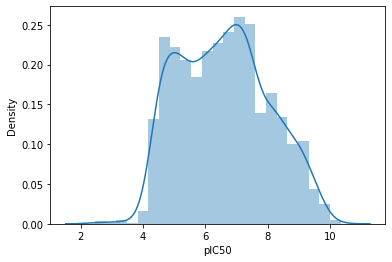

In [6]:
sns.distplot(y)


In [99]:
#skewness and kurtosis
# Skewness > 0 ，正偏差数值较大，为正偏或右偏。长尾巴拖在右边，数据右端有较多的极端值。
# Kurtosis<0 比正态分布的高峰来得平台——平顶峰
print("Skewness: %f" % y.skew())  #偏度
print("Kurtosis: %f" % y.kurt())  #峰度

Skewness: 0.182648
Kurtosis: -0.783636


In [16]:
df.shape

(1974, 730)

In [100]:
del_df = delete_zero_and_var(df, 0.005)
corrmat = del_df.corr()

# f, ax = plt.subplots(figsize=(40, 28)) 不画了
# sns.heatmap(corrmat, vmax=0.8, square=True)

最终剩余特征数 333
sum=0特征:  225 方差过小特征:  172
['ALogP', 'ALogp2', 'AMR', 'apol', 'nAtom', 'nHeavyAtom', 'nH', 'nB', 'nN', 'nP', 'nCl', 'nI', 'ATSc1', 'ATSc2', 'ATSc4', 'ATSc5', 'ATSm1', 'ATSm2', 'ATSm3', 'ATSm4', 'ATSm5', 'ATSp1', 'ATSp2', 'nBase', 'nBonds', 'nBonds2', 'nBondsS', 'nBondsS2', 'nBondsS3', 'nBondsD2', 'nBondsQ', 'bpol', 'C1SP2', 'VCH-4', 'SC-3', 'SC-6', 'SPC-4', 'SP-0', 'SP-1', 'SP-2', 'SP-3', 'VP-0', 'VP-1', 'VP-2', 'CrippenLogP', 'CrippenMR', 'ECCEN', 'nHBd', 'nwHBd', 'nHBa', 'nHBint2', 'nHBint3', 'nHBint5', 'nHBint6', 'nHBint7', 'nHBint8', 'nHBint9', 'nHBint10', 'nHdNH', 'nHsSH', 'nHsNH2', 'nHssNH', 'nHsNH3p', 'nHssNH2p', 'nHsssNHp', 'nHCsatu', 'nHmisc', 'nsLi', 'nssBe', 'nssssBem', 'nsBH2', 'nssBH', 'nsssB', 'nssssBm', 'nddC', 'ndssC', 'nsNH3p', 'nsNH2', 'nssNH2p', 'ndNH', 'nssNH', 'nsssNHp', 'nddsN', 'nssssNp', 'ndO', 'naOm', 'nsOm', 'nsSiH3', 'nssSiH2', 'nsssSiH', 'nssssSi', 'nsPH2', 'nssPH', 'nsssP', 'ndsssP', 'nddsP', 'nsssssP', 'nsSH', 'nssS', 'ndssS', 'nssssssS', 'nSm'

In [101]:
# 505 -1 = 504
list(del_df.drop('pIC50',axis=1))

['nAcid',
 'naAromAtom',
 'nAromBond',
 'nC',
 'nO',
 'nS',
 'nF',
 'nBr',
 'nX',
 'ATSc3',
 'ATSp3',
 'ATSp4',
 'ATSp5',
 'BCUTw-1l',
 'BCUTw-1h',
 'BCUTc-1l',
 'BCUTc-1h',
 'BCUTp-1l',
 'BCUTp-1h',
 'nBondsD',
 'nBondsT',
 'nBondsM',
 'C1SP1',
 'C2SP1',
 'C2SP2',
 'C3SP2',
 'C1SP3',
 'C2SP3',
 'C3SP3',
 'C4SP3',
 'SCH-3',
 'SCH-4',
 'SCH-5',
 'SCH-6',
 'SCH-7',
 'VCH-3',
 'VCH-5',
 'VCH-6',
 'VCH-7',
 'SC-4',
 'SC-5',
 'VC-3',
 'VC-4',
 'VC-5',
 'VC-6',
 'SPC-5',
 'SPC-6',
 'VPC-4',
 'VPC-5',
 'VPC-6',
 'SP-4',
 'SP-5',
 'SP-6',
 'SP-7',
 'VP-3',
 'VP-4',
 'VP-5',
 'VP-6',
 'VP-7',
 'nwHBa',
 'nHBint4',
 'nHsOH',
 'nHaaNH',
 'nHtCH',
 'nHdCH2',
 'nHdsCH',
 'nHaaCH',
 'nHCHnX',
 'nHCsats',
 'nHAvin',
 'nHother',
 'nsCH3',
 'ndCH2',
 'nssCH2',
 'ntCH',
 'ndsCH',
 'naaCH',
 'nsssCH',
 'ntsC',
 'naasC',
 'naaaC',
 'nssssC',
 'naaNH',
 'ntN',
 'ndsN',
 'naaN',
 'nsssN',
 'naasN',
 'nsOH',
 'nssO',
 'naaO',
 'nsF',
 'ndS',
 'naaS',
 'nddssS',
 'nsBr',
 'SwHBa',
 'SHBint4',
 'SHsOH',
 'SHaa

In [9]:
k = 21  # 关系矩阵中将显示10个特征
plt.figure(figsize=(20, 14))
cols = corrmat.nlargest(k, 'pIC50')['pIC50'].index
print("选取最优的20个特征：", corrmat.nlargest(50, 'pIC50')['pIC50'].index)
raw_selected = ['MDEC-23', 'MLogP', 'LipoaffinityIndex', 'maxsOH', 'minsOH--', 'nC',
                'nT6Ring', 'n6Ring--类似', 'minsssN--', 'BCUTp-1h', 'C2SP2', 'AMR', 'SwHBa--',
                'maxsssN--类似', 'MDEC-22--', 'SP-5', 'SaaCH--', 'CrippenLogP', 'maxHsOH-',
                'nHaaCH--']
# 最终选取的特征
raw_selected = ['MDEC-23', 'MLogP', 'LipoaffinityIndex', 'maxsOH', 'nC',
                'nT6Ring', 'minsssN', 'BCUTp-1h', 'C2SP2', 'AMR',"WPOL",
                'SP-5', 'CrippenLogP', "MDEC-22",'nBonds2','Zagreb',]

# raw_selected = ['MDEC-23', 'MLogP', 'LipoaffinityIndex', 'maxsOH', 'minsOH', 'nC',
#                 'nT6Ring', 'n6Ring', 'minsssN', 'BCUTp-1h', 'C2SP2', 'AMR',
#                 'maxsssN', 'SP-5', 'CrippenLogP', "MDEC-22"]


# 从20-30挑选
add_b30 = ['ATSp4', 'VAdjMat']
# 从随机森林挑选
add_eft = ['ATSc3']
#
add_rfe = ["ETA_Alpha"]
fianl_feature = raw_selected + add_b30 + add_eft + add_rfe

cm = np.corrcoef(del_df[cols].values.T)
# sns.set(font_scale=1.25)
# hm = sns.heatmap(cm, cbar=True, annot=True,
#                  square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
# plt.show()

选取最优的20个特征： Index(['pIC50', 'MDEC-23', 'MLogP', 'LipoaffinityIndex', 'maxsOH', 'minsOH',
       'nC', 'nT6Ring', 'n6Ring', 'minsssN', 'BCUTp-1h', 'C2SP2', 'AMR',
       'SwHBa', 'maxsssN', 'MDEC-22', 'SP-5', 'SaaCH', 'CrippenLogP',
       'maxHsOH', 'nHaaCH', 'naaCH', 'ATSp4', 'ATSp2', 'minHsOH', 'ATSp1',
       'SP-6', 'nHother', 'VAdjMat', 'VP-3', 'ATSp3', 'SP-7', 'ATSp5', 'apol',
       'VP-4', 'VP-1', 'VP-5', 'VP-2', 'nBonds2', 'nBonds', 'SP-3', 'Zagreb',
       'SP-4', 'CrippenMR', 'nwHBa', 'WTPT-1', 'ETA_Alpha', 'WPOL', 'nBondsS',
       'nAtom'],
      dtype='object')


<Figure size 1440x1008 with 0 Axes>

c:\users\admin\pycharmprojects\unienv\venv\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


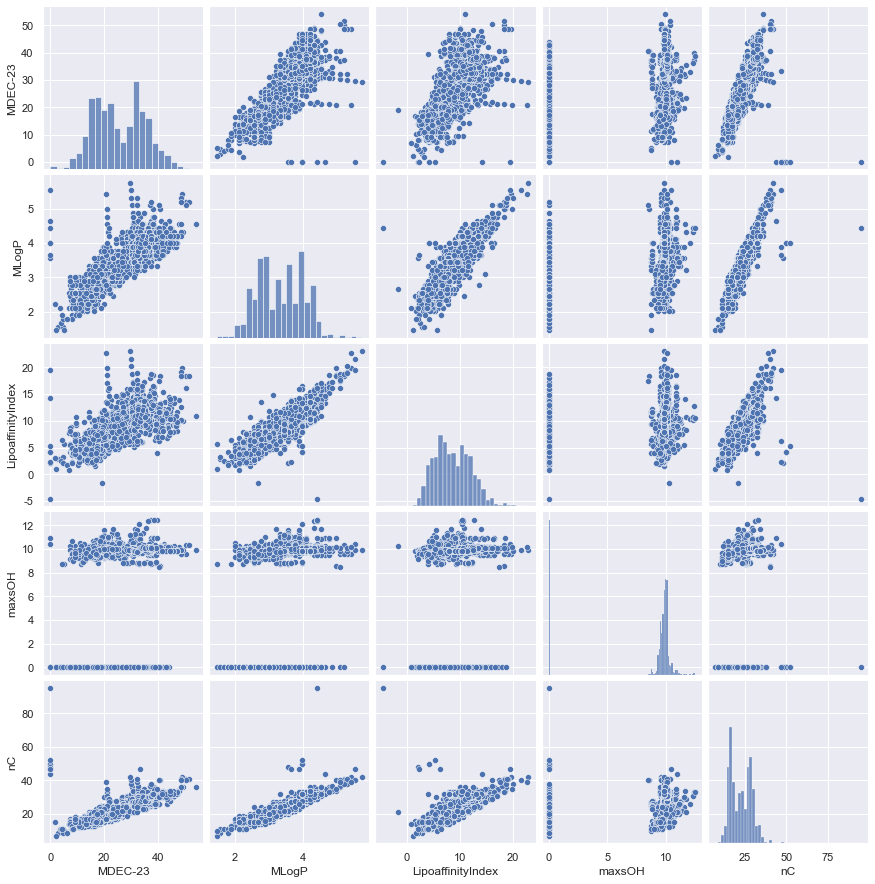

In [202]:
# 绘制关系散点图
feature = fianl_feature
sns.set()
cols = feature[:5]
sns.pairplot(del_df[cols], size=2.5)
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='MDEC-23', ylabel='pIC50'>

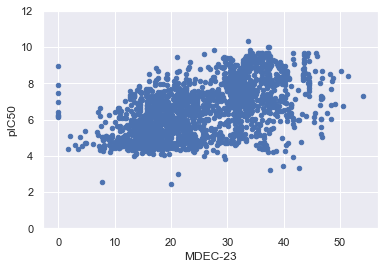

In [82]:
# 单个对于总特征关系
var = 'MDEC-23'
data = pd.concat([del_df['pIC50'], del_df[var]], axis=1)
data.plot.scatter(x=var, y="pIC50", ylim=(0, 12))

c:\users\admin\pycharmprojects\unienv\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


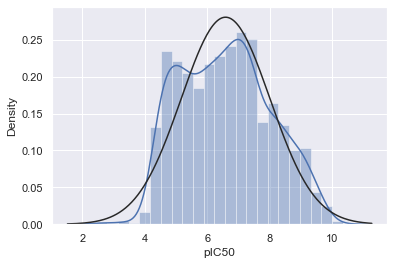

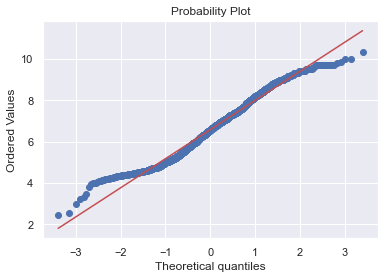

In [80]:
from scipy import stats
from scipy.stats import norm

#histogram and normal probability plot

sns.distplot(del_df['pIC50'], fit=norm);
fig = plt.figure()
res = stats.probplot(del_df['pIC50'], plot=plt)

In [102]:
# Models
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import ElasticNet, ElasticNetCV
from sklearn.svm import SVR
import lightgbm as lgb
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from mlxtend.regressor import StackingCVRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import KFold, cross_val_score

# Setup cross validation folds
kf = KFold(n_splits=5, random_state=42, shuffle=True)

# Light Gradient Boosting Regressor
lightgbm = LGBMRegressor(objective='regression',
                         num_leaves=6,
                         learning_rate=0.01,
                         n_estimators=7000,
                         max_bin=200,
                         bagging_fraction=0.8,
                         bagging_freq=4,
                         bagging_seed=8,
                         feature_fraction=0.2,
                         feature_fraction_seed=8,
                         min_sum_hessian_in_leaf=11,
                         verbose=-1,
                         random_state=42)

# XGBoost Regressor
xgboost = XGBRegressor(learning_rate=0.01,
                       n_estimators=6000,
                       max_depth=4,
                       min_child_weight=0,
                       gamma=0.6,
                       subsample=0.7,
                       colsample_bytree=0.7,
                       objective='reg:linear',
                       nthread=-1,
                       scale_pos_weight=1,
                       seed=27,
                       reg_alpha=0.00006,
                       random_state=42)

# Support Vector Regressor
svr = make_pipeline(RobustScaler(), SVR(C=100, epsilon=0.008, gamma=0.003))

# Gradient Boosting Regressor
gbr = GradientBoostingRegressor(n_estimators=3000,
                                learning_rate=0.01,
                                max_depth=4,
                                max_features='sqrt',
                                min_samples_leaf=15,
                                min_samples_split=10,
                                loss='huber',
                                random_state=42)

# Random Forest Regressor
rf = RandomForestRegressor(n_estimators=800,
                           max_depth=15,
                           min_samples_split=5,
                           min_samples_leaf=5,
                           max_features=None,
                           oob_score=True,
                           random_state=42)

# Stack up all the models above, optimized using xgboost
stack_gen = StackingCVRegressor(regressors=(xgboost, lightgbm, svr, gbr, rf),
                                meta_regressor=xgboost,
                                use_features_in_secondary=True)


In [104]:
need_ioc = corrmat.nlargest(505, 'pIC50')['pIC50'].index.drop("pIC50")

# print(del_df['pIC50'])
input = del_df[need_ioc]
# input = del_df[fianl_feature]
# input = input.apply(lambda x: (x - x.min()) / (x.max() - x.min()))
print("\t\tMinMax normalization\n ", input)
y = df["pIC50"]
X_train, X_test, y_train, y_test = train_test_split(input, y, test_size=0.2, random_state=0, shuffle=True)


# Define error metrics
def mse(y, y_pred):
    return mean_squared_error(y, y_pred)


def mae(y, y_pred):
    return mean_absolute_error(y, y_pred)


def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))


def cv_rmse(model, X=X_train, y=y_train):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=kf))
    return (rmse)

		MinMax normalization
          MDEC-23  MLogP  LipoaffinityIndex     maxsOH     minsOH  nC  nT6Ring  \
0     28.277932   3.77          11.830949   9.968948   9.968948  26        4   
1     31.076748   3.99          13.149974  10.058948  10.058948  28        4   
2     30.901064   3.77          10.577177   9.977508   9.752886  27        5   
3     30.570001   3.99          13.212767  10.025028  10.025028  28        5   
4     30.570001   3.99          12.489691   9.993342   9.993342  28        5   
...         ...    ...                ...        ...        ...  ..      ...   
1969  45.421854   4.21          10.292932   9.862971   9.808143  34        5   
1970  45.421854   3.99           7.884092   9.829120   9.696786  32        5   
1971  44.466435   3.99           7.965074   9.815320   9.645181  32        5   
1972  32.179316   3.33           6.236558   9.706524   9.668706  24        4   
1973  44.466435   4.21          10.371184   9.845961   9.793792  34        5   

      n6Ring  

In [105]:
scores = {}

score = cv_rmse(lightgbm)
print("lightgbm: {:.4f} ({:.4f})".format(score.mean(), score.std()))
scores['lgb'] = (score.mean(), score.std())

[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] featu

In [106]:
score = cv_rmse(xgboost)
print("xgboost: {:.4f} ({:.4f})".format(score.mean(), score.std()))
scores['xgb'] = (score.mean(), score.std())


[12:48:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[12:49:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[12:49:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[12:50:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[12:50:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
xgboost: 0.6989 (0.0443)


In [107]:
score = cv_rmse(svr)
print("SVR: {:.4f} ({:.4f})".format(score.mean(), score.std()))
scores['svr'] = (score.mean(), score.std())

SVR: 0.8663 (0.0504)


In [108]:
# 有点慢
score = cv_rmse(rf)
print("rf: {:.4f} ({:.4f})".format(score.mean(), score.std()))
scores['rf'] = (score.mean(), score.std())

rf: 0.7168 (0.0275)


In [109]:
# 更加慢
score = cv_rmse(gbr)
print("gbr: {:.4f} ({:.4f})".format(score.mean(), score.std()))
scores['gbr'] = (score.mean(), score.std())

gbr: 0.6920 (0.0391)


### 对模型的训练


In [110]:
# 开始训练模型
print('stack_gen done')
stack_gen_model = stack_gen.fit(X_train, y_train)

stack_gen done
[12:56:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[12:56:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[12:57:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[12:57:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[12:57:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current valu

In [111]:
print('lightgbm done')
lgb_model_full_data = lightgbm.fit(X_train, y_train)

lightgbm done


In [112]:
print('xgboost done')
xgb_model_full_data = xgboost.fit(X_train, y_train)

xgboost done
[13:06:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.


In [113]:
print('Svr done')
svr_model_full_data = svr.fit(X_train, y_train)

Svr done


In [114]:
print('RandomForest done')
rf_model_full_data = rf.fit(X_train, y_train)

RandomForest done


In [115]:
print('GradientBoosting done')
gbr_model_full_data = gbr.fit(X_train, y_train)

GradientBoosting done


In [116]:
# Blend models in order to make the final predictions more robust to overfitting
def blended_predictions(X):
    return (
        # (0 * ridge_model_full_data.predict(X)) + \
            (0.05 * svr_model_full_data.predict(X)) +
            (0.1 * gbr_model_full_data.predict(X)) +
            (0.1 * xgb_model_full_data.predict(X)) +
            (0.35 * lgb_model_full_data.predict(X)) +
            (0.05 * rf_model_full_data.predict(X)) +
            (0.40 * stack_gen_model.predict(X)))

In [36]:
# Get final precitions from the blended model
y_perd = blended_predictions(X_test)
blended_score = mse(y_test, y_perd)
scores['blended'] = (blended_score, 0)
print('MSE score on test data:', blended_score)
print('RMSLE score on test data:', rmsle(y_test, y_perd))
print('MAE score on test data:', mae(y_test, y_perd))

print(y_perd.shape)

MSE score on test data: 0.5813010438696226
RMSLE score on test data: 0.7624310092523929
MAE score on test data: 0.5709202256728442
(395,)


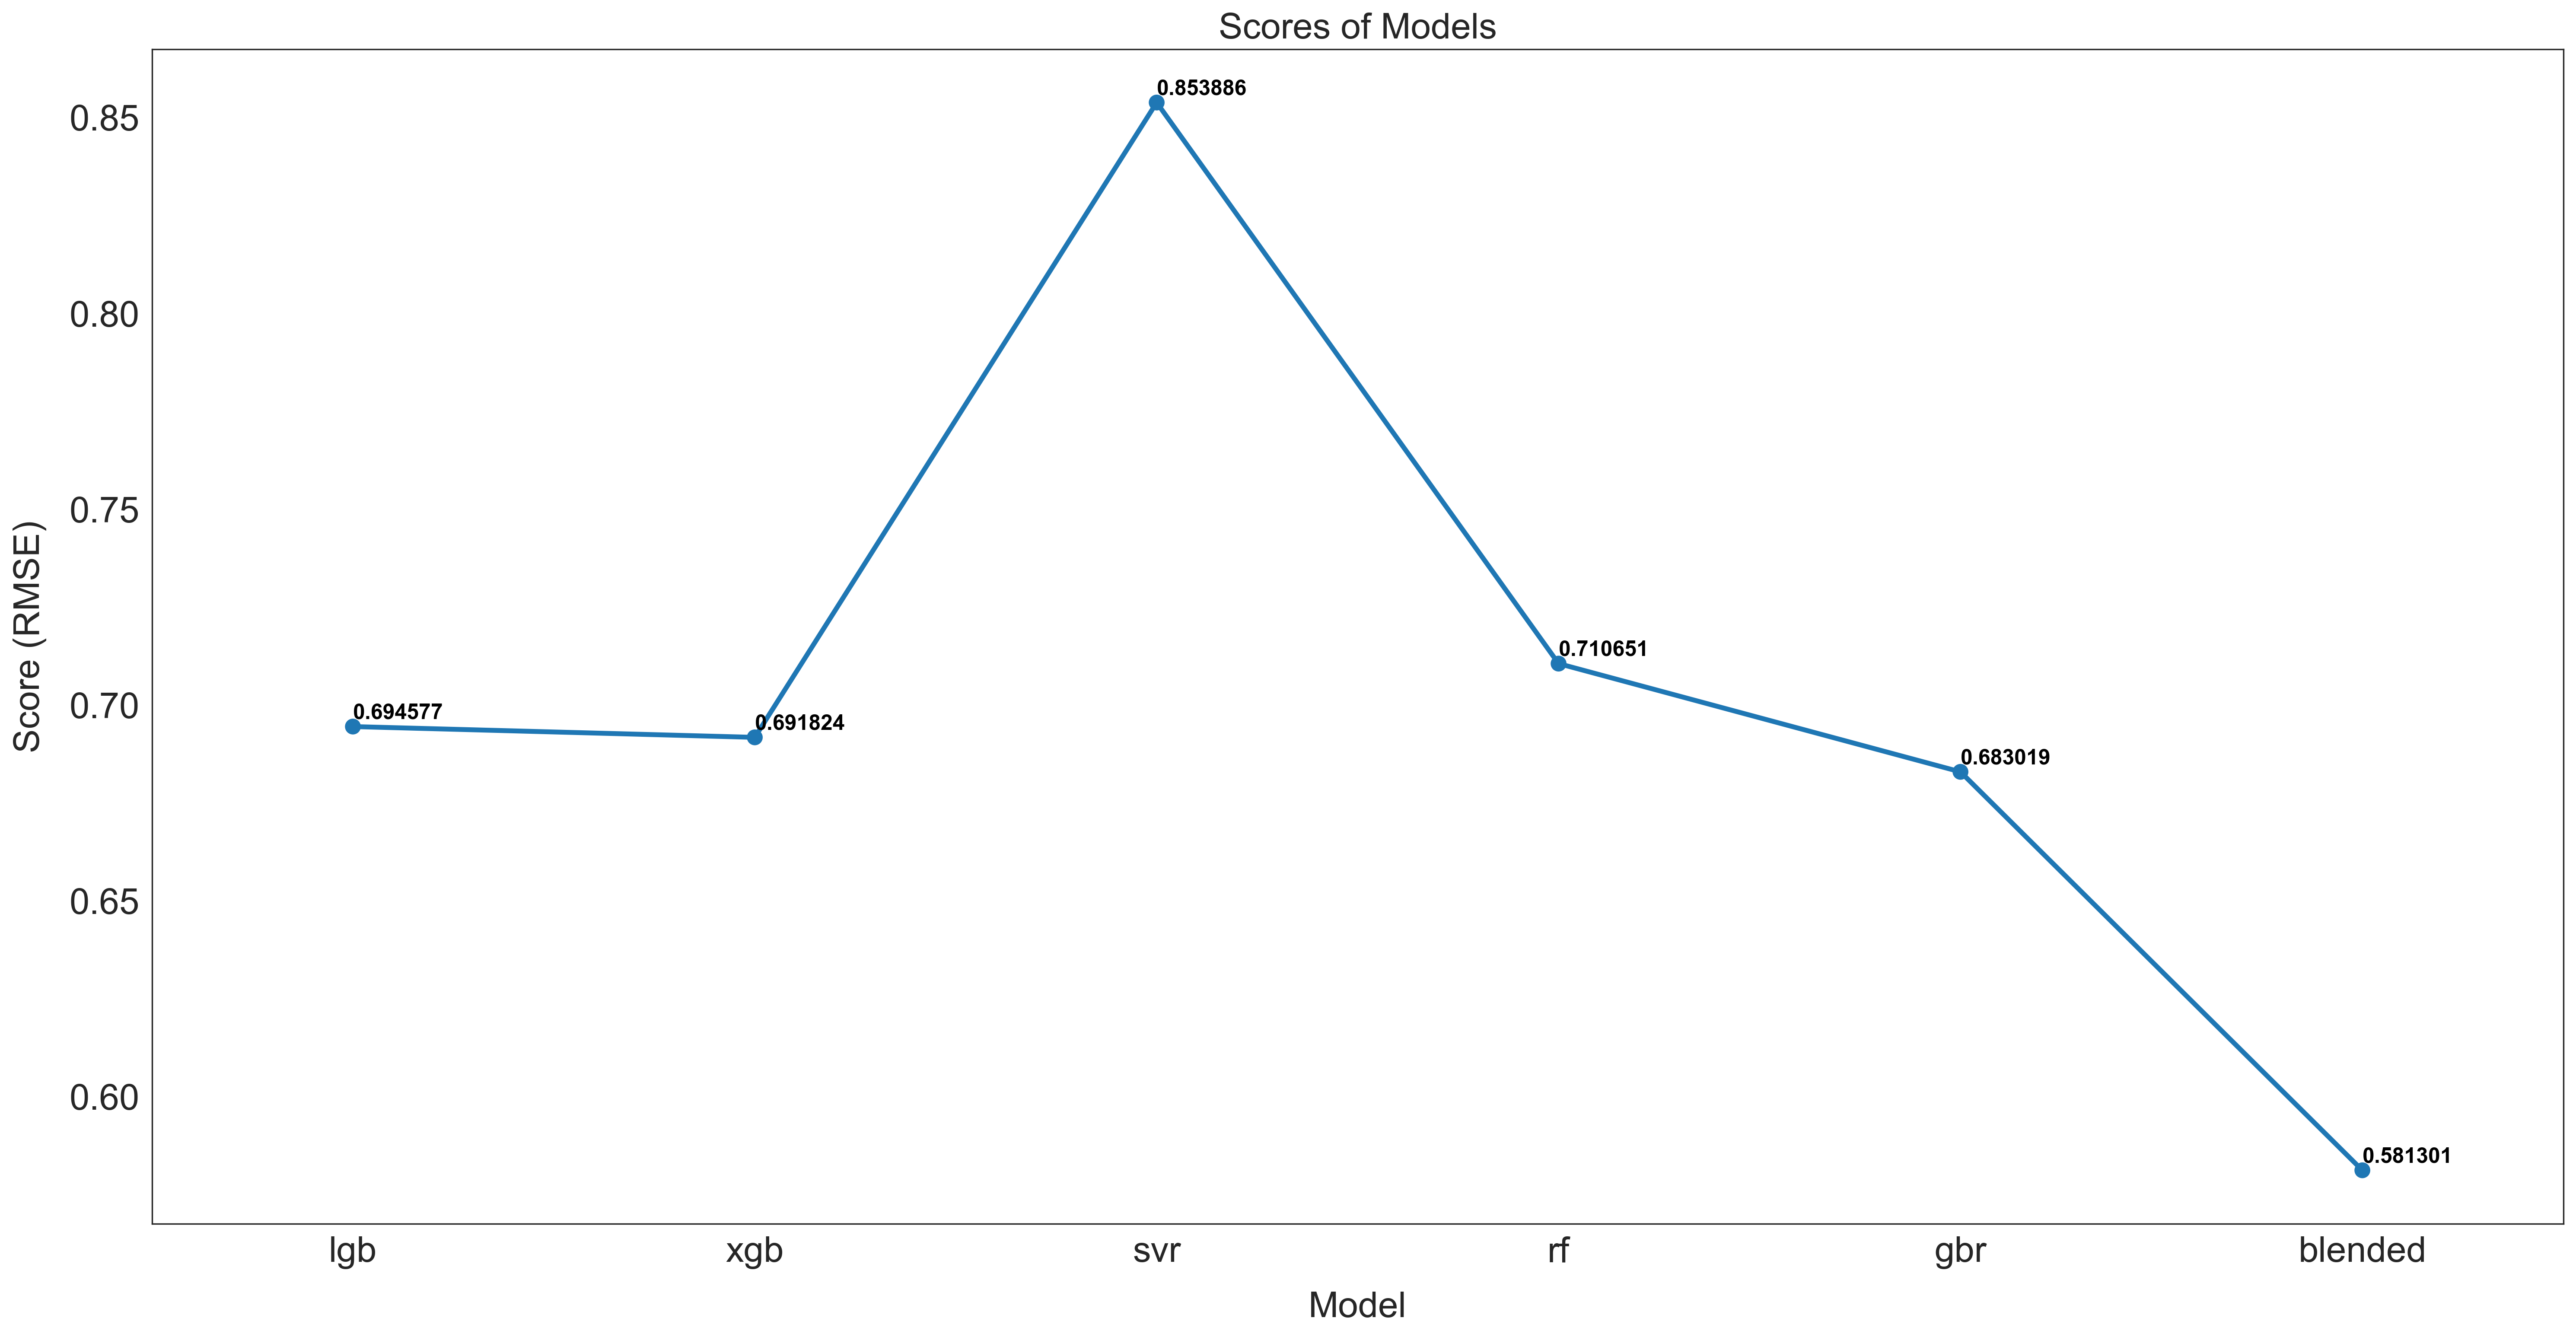

In [88]:
# Plot the predictions for each model
sns.set_style("white")

fig = plt.figure(figsize=(24, 12),dpi=300)

ax = sns.pointplot(x=list(scores.keys()), y=[score for score, _ in scores.values()], markers=['o'], linestyles=['-'])
for i, score in enumerate(scores.values()):
    ax.text(i, score[0] + 0.002, '{:.6f}'.format(score[0]), horizontalalignment='left', size='large', color='black',
            weight='semibold')

plt.ylabel('Score (RMSE)', size=20, labelpad=12.5)
plt.xlabel('Model', size=20, labelpad=12.5)
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)

plt.title('Scores of Models', size=20)

plt.show()

In [117]:
y_test

18      6.437
294     6.316
1174    4.827
1703    8.046
512     5.871
        ...  
820     6.420
1638    6.420
251     9.367
1781    6.567
1099    5.098
Name: pIC50, Length: 395, dtype: float64

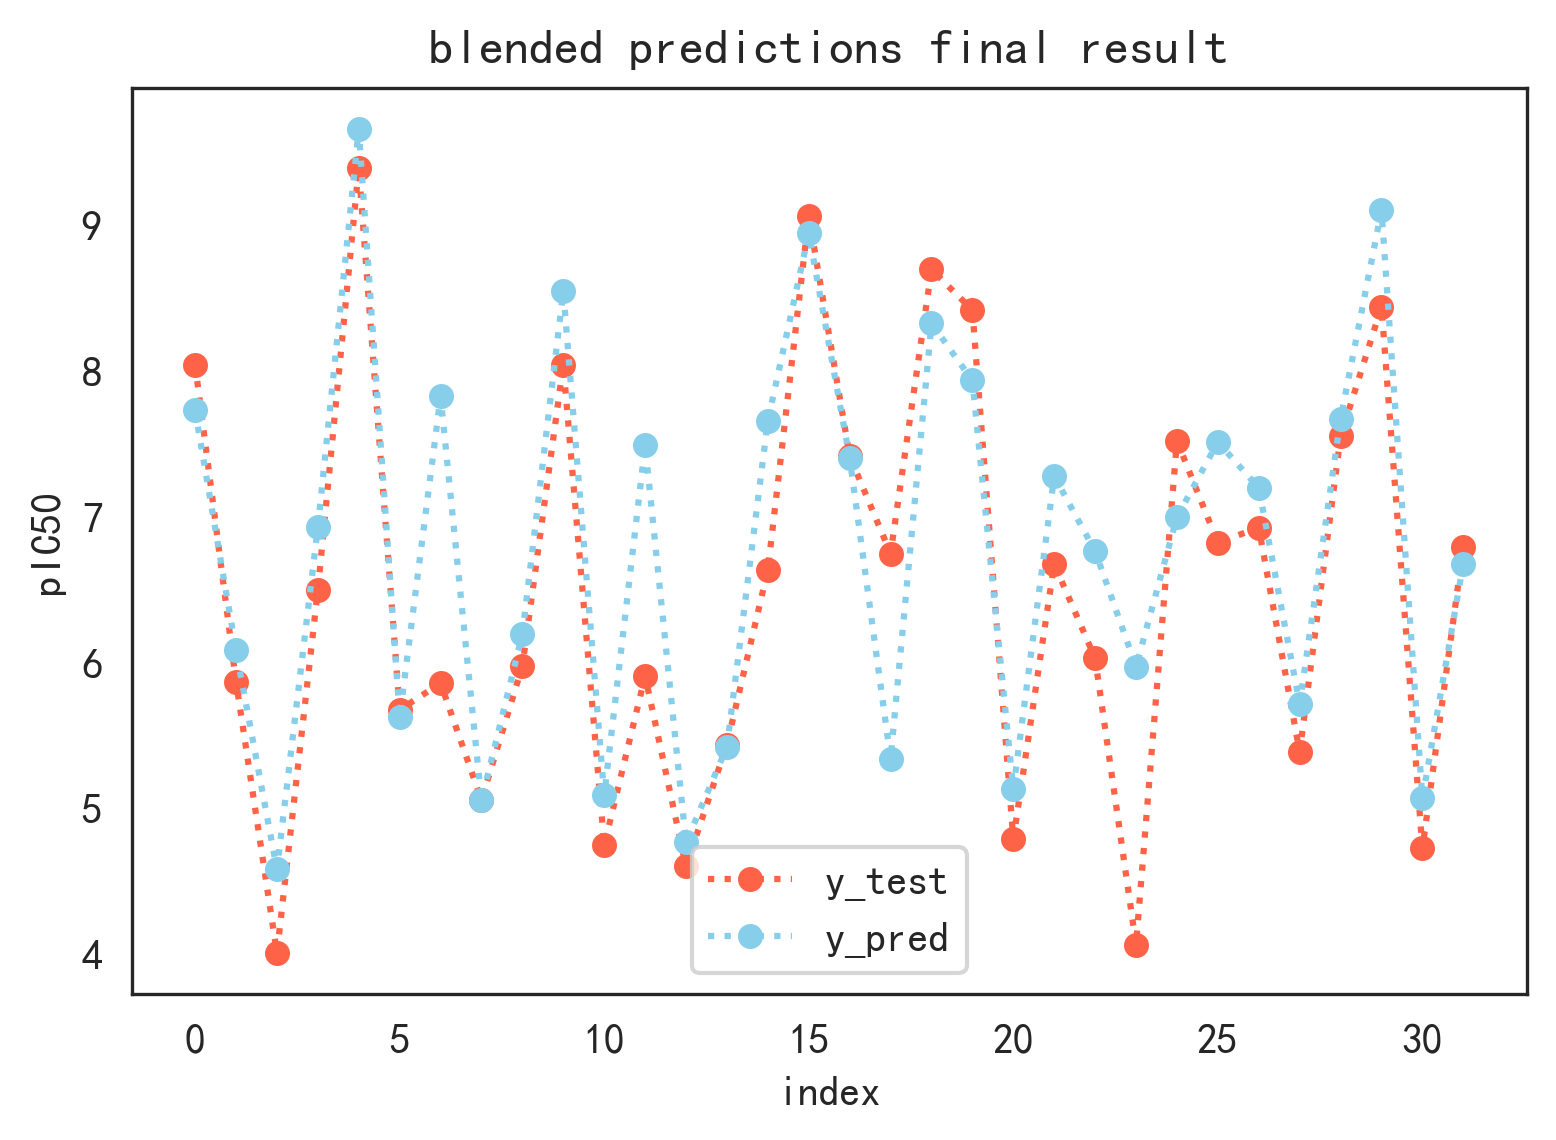

In [118]:
plt.rcParams['font.sans-serif'] = [u'SimHei']
plt.rcParams['axes.unicode_minus'] = False

plt.figure(dpi=300)
plt.plot(y_test.values[3:35],color="tomato",label="y_test",linestyle=':',marker='o',ms=5) #颜色表示
plt.plot(y_perd[3:35],color="skyblue",label="y_pred",linestyle=':',marker='o',ms=5)
plt.xlabel("index") #x轴命名表示
plt.ylabel("pIC50") #y轴命名表示
plt.title("blended predictions final result")
plt.legend()#增加图例



In [120]:
# 验证测试集
use_feature = list(del_df.drop('pIC50',axis=1))

data_test = test_df[use_feature]

scale
# blended_predictions(test_input)
print(np.isnan(data_test).any())

data_test['C1SP1']=10
data_test.describe()['C1SP1']

for index, row in data_test.iteritems():
    if index != "SMILES" and index != "pIC50":

        if data_test[index].sum() == 0.0:
            print(index)
            data_test[index] = 0.001

output = blended_predictions(data_test)
pd.DataFrame(output,columns=["Pred"])
# pd.DataFrame(output,columns=["Pred"]).to_excel("pred.xlsx")

nAcid               False
naAromAtom          False
nAromBond           False
nC                  False
nO                  False
                    ...  
LipinskiFailures    False
VAdjMat             False
WTPT-2              False
WTPT-4              False
XLogP               False
Length: 332, dtype: bool


<ipython-input-120-06e24ead5358>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test['C1SP1']=10


nBr
SCH-3
SCH-4
VCH-3
nHtCH
nHCHnX
ntCH
ntN
ndsN
naaO
ndS
nsBr
SHtCH
StCH
StN
SdsN
SaaO
minwHBd
minHtCH
minHCHnX
mintCH
mintN
mindsN
minaaO
minsOm
maxwHBd
maxHtCH
maxHCHnX
maxtCH
maxtN
maxdsN
maxaaO
maxsOm
maxsBr
n3Ring
nF8Ring
nF12Ring
nT8Ring
nT12Ring


<ipython-input-120-06e24ead5358>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test[index] = 0.001


,Pred
0,5.940275
1,5.912125
2,5.933795
3,5.884109
4,5.887221
5,5.869480
6,5.771103
7,5.837673
8,5.859132
9,5.877178
